In [ ]:
%matplotlib inline

In [2]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
# import csv
housing_data_df =  pd.read_csv("Resources/housing.csv")
housing_data_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# grab non-null values from rooms and bedrooms
room_df = housing_data_df[["total_rooms", "total_bedrooms"]].dropna()

tot_rooms = room_df["total_rooms"]
tot_bedrooms = room_df["total_bedrooms"]

# calculate linear regression
(rooms_m, rooms_b, rooms_r, rooms_p, rooms_sterr) = stats.linregress(tot_rooms, tot_bedrooms)


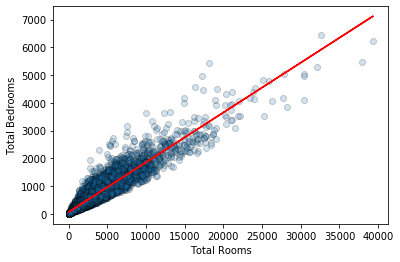

In [5]:
# set plot
fig, ax = plt.subplots()

# plot rooms vs bedrooms
ax.scatter(tot_rooms, tot_bedrooms, alpha = 0.2, edgecolor = 'k')

# plot regression line
reg_line = rooms_m * tot_rooms + rooms_b
ax.plot(tot_rooms, reg_line, color = 'r')

# set x.y labels
ax.set_xlabel("Total Rooms")
ax.set_ylabel("Total Bedrooms")

# show plot
plt.show()


In [6]:
# replace null bedrooms with predicted bedrooms from linear regression based on total_rooms
housing_data_df.loc[housing_data_df["total_bedrooms"].isnull(),"total_bedrooms"] = \
        np.floor(rooms_m * housing_data_df["total_rooms"] + rooms_b)

housing_data_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [20]:
coord = housing_data_df[["latitude", "longitude"]]


In [10]:
housing_data_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.732607,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.490692,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
housing_data_df.median()

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

In [25]:
# reported crime data in California
crime_df = pd.read_csv("Resources/hci_crime_752_pl_co_re_ca_2000-2013_21oct15.csv", encoding="ISO-8859-1", low_memory=False)
crime_df.head()


,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,...,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version
0,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
1,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
2,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
3,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
4,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,6.217499,6.190935,6.244063,0.013553,0.217985,NaN,1.0,33873086.0,10/21/2015


In [26]:
# dataframe of crimes reported in 2000
recent_crime_df = crime_df[crime_df["reportyear"] == 2000]

recent_crime_df


,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,...,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version
0,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
1,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
2,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
3,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33873086.0,10/21/2015
4,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CA,6.0,California,NaN,NaN,...,33847694.0,6.217499,6.190935,6.244063,0.013553,0.217985,NaN,1.000000,33873086.0,10/21/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,RE,14.0,Southern California,NaN,NaN,...,16516006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16516703.0,10/21/2015
3387,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,RE,14.0,Southern California,NaN,NaN,...,16516006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16516703.0,10/21/2015
3388,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,RE,14.0,Southern California,NaN,NaN,...,16516006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16516703.0,10/21/2015
3389,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,RE,14.0,Southern California,NaN,NaN,...,16516006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16516703.0,10/21/2015


In [27]:
recent_crime_county_df = recent_crime_df[recent_crime_df["county_name"].notnull()]
recent_crime_county_df


,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,...,denominator,rate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,dof_population,version
5,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CO,6001.0,Alameda,6001.0,Alameda,...,1443741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1443939.0,10/21/2015
6,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CO,6001.0,Alameda,6001.0,Alameda,...,1443741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1443939.0,10/21/2015
7,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CO,6001.0,Alameda,6001.0,Alameda,...,1443741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1443939.0,10/21/2015
8,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CO,6001.0,Alameda,6001.0,Alameda,...,1443741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1443939.0,10/21/2015
9,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,CO,6001.0,Alameda,6001.0,Alameda,...,1443741.0,6.582206,6.449864,6.714547,0.067521,1.025816,NaN,1.058658,1443939.0,10/21/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,PL,87056.0,Yucca Valley town,6071.0,San Bernardino,...,16865.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16865.0,10/21/2015
3317,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,PL,87056.0,Yucca Valley town,6071.0,San Bernardino,...,16865.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16865.0,10/21/2015
3318,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,PL,87056.0,Yucca Valley town,6071.0,San Bernardino,...,16865.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16865.0,10/21/2015
3319,752,"Number of Violent Crimes per 1,000 Population",2000.0,9.0,Total,PL,87056.0,Yucca Valley town,6071.0,San Bernardino,...,16865.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16865.0,10/21/2015


In [34]:
# calcluate percentage of observed crimes per county

total_crime = len(recent_crime_county_df)
crime_count = recent_crime_county_df["county_name"].value_counts()
crime_percent = crime_count/total_crime *100

crime_percent = crime_percent.reset_index()

crime_percent = crime_percent.rename(columns={
    "index" : "county_name",
    "county_name" : "% Crime Observed"
}).set_index("county_name").sort_values("county_name")

crime_percent


,% Crime Observed
county_name,
Alameda,2.442702
Alpine,0.301568
Amador,0.904704
Butte,1.115802
Calaveras,0.753920
Colusa,0.482509
Contra Costa,3.799759
Del Norte,0.512666
El Dorado,0.633293


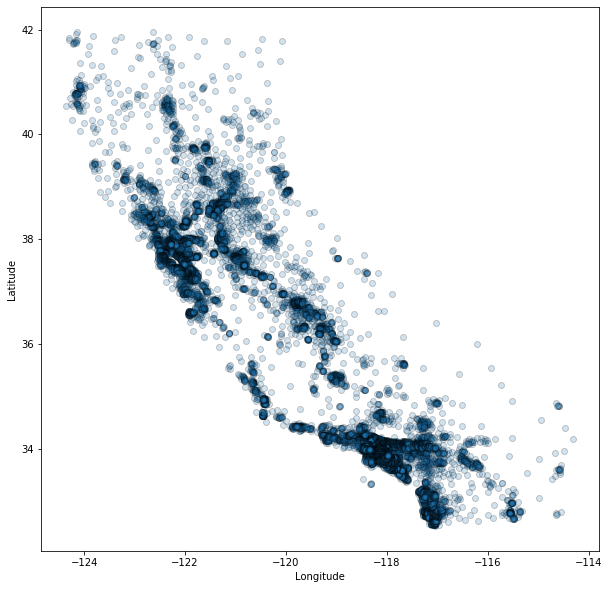

In [34]:
fig, ax = plt.subplots(figsize=(10,10))

x_val = housing_data_df["longitude"]
y_val = housing_data_df["latitude"]

ax.scatter(x_val, y_val, alpha=0.2, edgecolor='k')

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")


plt.show()
